In [156]:

#Create imports for modules
import fxcmpy
import pandas as pd
import numpy as np
import datetime as dt

#import funcs
from pyti.bollinger_bands import upper_bollinger_band as ubb
from pyti.bollinger_bands import middle_bollinger_band as mbb
from pyti.bollinger_bands import lower_bollinger_band as lbb
from pyti.bollinger_bands import percent_bandwidth as percent_b
from pyti.relative_strength_index import relative_strength_index as rsi
from pyti.simple_moving_average import simple_moving_average as sma

#import plots and styling
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('ggplot')




pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [157]:
#Establish connection using python-wrapper and config file
socket = fxcmpy.fxcmpy(config_file = 'fxcm.cfg')
socket.connect
#print (socket.get_instruments_for_candles())

<bound method fxcmpy.connect of <fxcmpy.fxcmpy.fxcmpy object at 0x0000014DD2B40630>>

In [172]:
day = dt.datetime.now().day
month = dt.datetime.now().month
year = dt.datetime.now().year
data = socket.get_candles(instrument = 'GBP/USD', period = 'H1', start = dt.datetime(year-1, month, day), end = dt.datetime(year, month, day))
#data = socket.get_candles(instrument = 'EUR/GBP', period = 'm1')EUR    

In [173]:
#Define useful variables
data['upper_band'] = ubb(data['askclose'], period = 20)
data['mid_band'] = mbb(data['askclose'], period = 20 )
data['lower_band'] = lbb(data['askclose'], period = 20 )
data['percent_b'] = percent_b(data['askclose'], period =20)
data['rsi'] = rsi(data['askclose'], period =14)
#data['sma'] = sma(data['askclose'], period =20)

In [174]:
data['tradebuy1'] = np.where(((data['askclose'] > data['askopen'])  ),1,0)
data['tradebuy2'] = np.where((  (data['mid_band'] < data['askclose'])  ),1,0)
data['tradebuy3'] = np.where(( (data['percent_b'] > 0.3) ),1,0)
data['tradebuy'] = np.where(( (data['tradebuy1'] * data['tradebuy2'] * data['tradebuy3']  > 0) ),'1',0)

In [175]:
data['tradesell1'] = np.where(((data['askclose'] < data['askopen'])  ),1,0)
data['tradesell2'] = np.where((  (data['mid_band'] > data['askclose'])  ),1,0)
data['tradesell3'] = np.where(( (data['percent_b'] > 0.3) ),1,0)
data['tradesell'] = np.where(( (data['tradesell1'] * data['tradesell2'] * data['tradesell3']  > 0) ),'1',0)

In [176]:
data

bidopen  bidclose  bidhigh   bidlow  askopen  askclose  \
date                                                                          
2018-10-08 00:00:00  1.31258   1.31197  1.31329  1.31190  1.31274   1.31199   
2018-10-08 01:00:00  1.31197   1.31202  1.31238  1.31162  1.31199   1.31206   
2018-10-08 02:00:00  1.31202   1.31184  1.31210  1.31132  1.31206   1.31191   
2018-10-08 03:00:00  1.31184   1.31114  1.31197  1.31091  1.31191   1.31117   
2018-10-08 04:00:00  1.31114   1.31087  1.31144  1.31084  1.31117   1.31090   
2018-10-08 05:00:00  1.31087   1.31095  1.31157  1.31055  1.31090   1.31097   
2018-10-08 06:00:00  1.31095   1.30842  1.31103  1.30840  1.31097   1.30846   
2018-10-08 07:00:00  1.30842   1.30621  1.30843  1.30606  1.30846   1.30623   
2018-10-08 08:00:00  1.30621   1.30560  1.30649  1.30471  1.30623   1.30562   
2018-10-08 09:00:00  1.30560   1.30627  1.30660  1.30552  1.30562   1.30630   
2018-10-08 10:00:00  1.30627   1.30308  1.30641  1.30289  1.30630   1.30312   
2018-10-08 11:00:00  1.30308   1.30412  1.30454  1.30282  1.30312   1.30416   
2018-10-08 12:00:00  1.30412   1.30477  1.30494  1.30286  1.30416   1.30482   
2018-10-08 13:00:00  1.30477   1.30534  1.30569  1.30398  1.30482   1.30537   
2018-10-08 14:00:00  1.30534   1.30709  1.30756  1.30527  1.30537   1.30712   
2018-10-08 15:00:00  1.30709   1.30590  1.30710  1.30521  1.30712   1.30590   
2018-10-08 16:00:00  1.30590   1.30737  1.30762  1.30558  1.30590   1.30740   
2018-10-08 17:00:00  1.30737   1.30936  1.30977  1.30676  1.30740   1.30941   
2018-10-08 18:00:00  1.30936   1.30916  1.30957  1.30877  1.30941   1.30916   
2018-10-08 19:00:00  1.30916   1.30957  1.30958  1.30893  1.30916   1.30960   
2018-10-08 20:00:00  1.30957   1.30891  1.30957  1.30888  1.30960   1.30966   
2018-10-08 21:00:00  1.30891   1.30908  1.30948  1.30851  1.30966   1.30927   
2018-10-08 22:00:00  1.30908   1.30903  1.30925  1.30878  1.30927   1.30926   
2018-10-08 23:00:00  1.30903   1.30924  1.30934  1.30901  1.30926   1.30930   
2018-10-09 00:00:00  1.30924   1.30872  1.30929  1.30859  1.30930   1.30876   
2018-10-09 01:00:00  1.30872   1.30880  1.30936  1.30870  1.30876   1.30883   
2018-10-09 02:00:00  1.30880   1.30939  1.30943  1.30874  1.30883   1.30942   
2018-10-09 03:00:00  1.30939   1.30919  1.30946  1.30912  1.30942   1.30923   
2018-10-09 04:00:00  1.30919   1.31051  1.31061  1.30909  1.30923   1.31056   
2018-10-09 05:00:00  1.31051   1.30976  1.31053  1.30933  1.31056   1.30981   
2018-10-09 06:00:00  1.30976   1.30775  1.30980  1.30729  1.30981   1.30776   
2018-10-09 07:00:00  1.30775   1.30585  1.30889  1.30546  1.30776   1.30588   
2018-10-09 08:00:00  1.30585   1.30643  1.30691  1.30504  1.30588   1.30644   
2018-10-09 09:00:00  1.30643   1.30413  1.30648  1.30373  1.30644   1.30417   
2018-10-09 10:00:00  1.30413   1.30502  1.30573  1.30333  1.30417   1.30505   
2018-10-09 11:00:00  1.30502   1.30356  1.30566  1.30345  1.30505   1.30357   
2018-10-09 12:00:00  1.30356   1.30690  1.30730  1.30330  1.30357   1.30690   
2018-10-09 13:00:00  1.30690   1.30509  1.30756  1.30484  1.30690   1.30512   
2018-10-09 14:00:00  1.30509   1.30892  1.31092  1.30450  1.30512   1.30891   
2018-10-09 15:00:00  1.30892   1.31385  1.31497  1.30853  1.30891   1.31385   
2018-10-09 16:00:00  1.31385   1.31307  1.31477  1.31252  1.31385   1.31311   
2018-10-09 17:00:00  1.31307   1.31398  1.31483  1.31278  1.31311   1.31402   
2018-10-09 18:00:00  1.31398   1.31458  1.31503  1.31372  1.31402   1.31461   
2018-10-09 19:00:00  1.31458   1.31437  1.31481  1.31410  1.31461   1.31439   
2018-10-09 20:00:00  1.31437   1.31428  1.31473  1.31391  1.31439   1.31448   
2018-10-09 21:00:00  1.31428   1.31396  1.31472  1.31338  1.31448   1.31426   
2018-10-09 22:00:00  1.31396   1.31442  1.31480  1.31386  1.31426   1.31448   
2018-10-09 23:00:00  1.31442   1.31566  1.31584  1.31426  1.31448   1.31570   
2018-10-10 00:00:00  1.31566   1.31536  1.31574  1.31471  1.31570   1.3

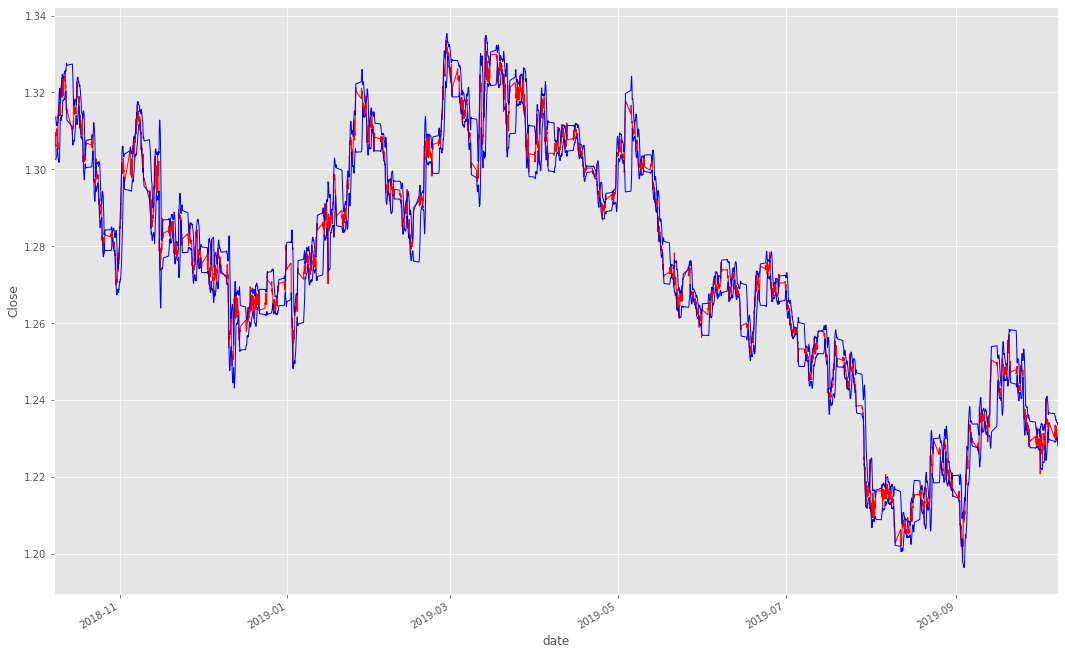

In [177]:
fig = plt.figure(figsize=(18,12))

ax1 = fig.add_subplot(111,  xlabel = 'Date',ylabel='Close')

data['askclose'].plot(ax=ax1, color='r', lw=1)
data['upper_band'].plot(ax=ax1, color = 'b', lw= 1)
###data['mid_band'].plot(ax=ax1, color = 'g', lw= 1)
data['lower_band'].plot(ax=ax1, color = 'b', lw= 1)
##data['rsi'].plot(ax=ax1, color = 'm', lw= 1.5)
#data['sma'].plot(ax=ax1, color = 'y', lw= 2)

In [178]:
def myaction():
    buy_prices = []
    sell_prices = []
    order = False
    for i, row in data.iterrows():
        #print(row['tradebuy'])
        #buy
        if row['tradebuy'] == '1' and order == False:
            print("Create buy order since tradebuy = 1 ")
            print("Price bought: " +str(float(row['askopen'])) )
            buy_prices.append(float(row['askopen']))
            order = True
        # close buy order
        if row['tradesell'] == '1' and order == True:
            print("Create sell order tradesell == 1")
            print("Price sold: " +str(float(row['askopen'])))
            sell_prices.append(float(row['askopen']))
            order = False

            #,str(float(row['date'])),str(float(row['date']))
    

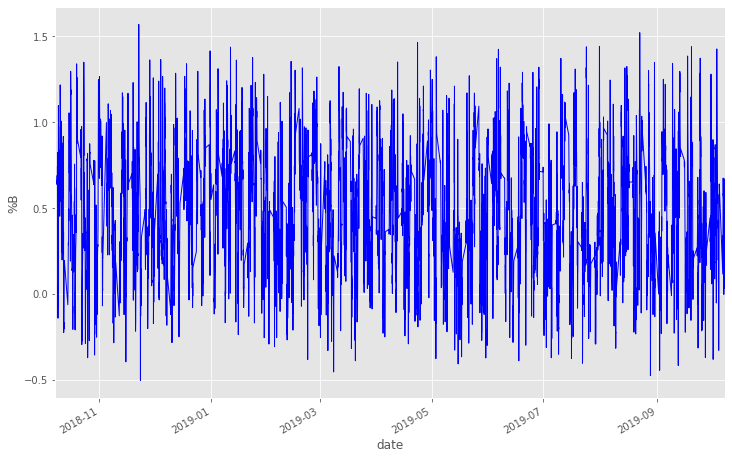

In [179]:
band_fig = plt.figure(figsize=(12,8))
ax2 = band_fig.add_subplot(111,  ylabel='%B')
data['percent_b'].plot(ax=ax2, color = 'b', lw= 1)

In [180]:
#For reference
#%B Above 1 = Price is Above the Upper Band
#%B Equal to 1 = Price is at the Upper Band
#%B Above .50 = Price is Above the Middle Line
#%B Below .50 = Price is Below the Middle Line
#%B Equal to 0 = Price is at the Lower Band
#%B Below 0 = Price is Below the Lower Band
#%B Above .80 = Price is Nearing the Upper Band
#%B Below .20 = Price is Nearing the Lower Band
#Define the strategy
def checkstrategy():
    buy_prices = []
    sell_prices = []
    order = False
    for i, row in data.iterrows():
        #print(row['tradebuy'])
        #buy
        if row['tradebuy'] == '1' and row['rsi'] < 72 and order == False:
            print("Create buy order since tradebuy = 1 ")
            print("Price bought: " +str(float(row['askopen'])) )
            buy_prices.append(float(row['askopen']))
            order = True
        # close buy order
        if row['tradesell'] == '1' and row['rsi'] > 28 and order == True:
            print("Create sell order tradesell == 1")
            print("Price sold: " +str(float(row['askopen'])))
            sell_prices.append(float(row['askopen']))
            order = False

            #,str(float(row['date'])),str(float(row['date']))
    pip_cost = 100
    lot_size = 0.3
    profits = 0
    for i in range(len(buy_prices)-1):
        profit = (sell_prices[i] - buy_prices[i]) *  pip_cost * lot_size

        profits += profit
        print("The return for trade " + str(i + 1) + " is: " + str(round(profit,2)))
    print("The return for the period is: " + str(round(profits,2)))
    

In [181]:
def checkstrategy1():
    buy_prices = []
    sell_prices = []
    order = False
    for i, row in data.iterrows():
        #print(row['tradebuy'])row['rsi'] < 72 and  and row['rsi'] > 28
        #buy
        if row['tradebuy'] == '1' and order == False:
            print("Create buy order since tradebuy = 1 ")
            print("Price bought: " +str(float(row['askopen'])) )
            buy_prices.append(float(row['askopen']))
            order = True
        # close buy order
        if row['tradesell'] == '1' and order == True:
            print("Create sell order tradesell == 1")
            print("Price sold: " +str(float(row['askopen'])))
            sell_prices.append(float(row['askopen']))
            order = False

            #,str(float(row['date'])),str(float(row['date']))
    pip_cost = 100
    lot_size = 0.3
    profits = 0
    for i in range(len(buy_prices)-1):
        profit = (sell_prices[i] - buy_prices[i]) *  pip_cost * lot_size

        profits += profit
        print("The return for trade " + str(i + 1) + " is: " + str(round(profit,2)))
    print("The return for the period is: " + str(round(profits,2)))
    

In [182]:
checkstrategy1()

Create buy order since tradebuy = 1 
Price bought: 1.30916
Create sell order tradesell == 1
Price sold: 1.30981
Create buy order since tradebuy = 1 
Price bought: 1.30512
Create sell order tradesell == 1
Price sold: 1.31637
Create buy order since tradebuy = 1 
Price bought: 1.31379
Create sell order tradesell == 1
Price sold: 1.32225
Create buy order since tradebuy = 1 
Price bought: 1.32071
Create sell order tradesell == 1
Price sold: 1.32529
Create buy order since tradebuy = 1 
Price bought: 1.31166
Create sell order tradesell == 1
Price sold: 1.31596
Create buy order since tradebuy = 1 
Price bought: 1.31502
Create sell order tradesell == 1
Price sold: 1.31886
Create buy order since tradebuy = 1 
Price bought: 1.30899
Create sell order tradesell == 1
Price sold: 1.31153
Create buy order since tradebuy = 1 
Price bought: 1.31095
Create sell order tradesell == 1
Price sold: 1.31284
Create buy order since tradebuy = 1 
Price bought: 1.30222
Create sell order tradesell == 1
Price sold: 

Create sell order tradesell == 1
Price sold: 1.30842
Create buy order since tradebuy = 1 
Price bought: 1.29372
Create sell order tradesell == 1
Price sold: 1.29647
Create buy order since tradebuy = 1 
Price bought: 1.29536
Create sell order tradesell == 1
Price sold: 1.2963
Create buy order since tradebuy = 1 
Price bought: 1.29037
Create sell order tradesell == 1
Price sold: 1.29503
Create buy order since tradebuy = 1 
Price bought: 1.29324
Create sell order tradesell == 1
Price sold: 1.29371
Create buy order since tradebuy = 1 
Price bought: 1.28664
Create sell order tradesell == 1
Price sold: 1.29052
Create buy order since tradebuy = 1 
Price bought: 1.28954
Create sell order tradesell == 1
Price sold: 1.2867
Create buy order since tradebuy = 1 
Price bought: 1.28692
Create sell order tradesell == 1
Price sold: 1.28703
Create buy order since tradebuy = 1 
Price bought: 1.27999
Create sell order tradesell == 1
Price sold: 1.28085
Create buy order since tradebuy = 1 
Price bought: 1.

In [183]:
#compair =sell_prices
#compair1 =buy_prices
#for i in range(len(compair)-1): 
#    print(compair[i] ,"          ",compair1[i] ,"  ", 10000*(compair[i] - compair1[i]))

In [184]:
checkstrategy()

Create buy order since tradebuy = 1 
Price bought: 1.30916
Create sell order tradesell == 1
Price sold: 1.30981
Create buy order since tradebuy = 1 
Price bought: 1.30512
Create sell order tradesell == 1
Price sold: 1.31637
Create buy order since tradebuy = 1 
Price bought: 1.31379
Create sell order tradesell == 1
Price sold: 1.32225
Create buy order since tradebuy = 1 
Price bought: 1.32071
Create sell order tradesell == 1
Price sold: 1.32529
Create buy order since tradebuy = 1 
Price bought: 1.31166
Create sell order tradesell == 1
Price sold: 1.31596
Create buy order since tradebuy = 1 
Price bought: 1.31502
Create sell order tradesell == 1
Price sold: 1.31886
Create buy order since tradebuy = 1 
Price bought: 1.30899
Create sell order tradesell == 1
Price sold: 1.31153
Create buy order since tradebuy = 1 
Price bought: 1.31095
Create sell order tradesell == 1
Price sold: 1.31284
Create buy order since tradebuy = 1 
Price bought: 1.30222
Create sell order tradesell == 1
Price sold: 

Create sell order tradesell == 1
Price sold: 1.3051
Create buy order since tradebuy = 1 
Price bought: 1.30339
Create sell order tradesell == 1
Price sold: 1.30844
Create buy order since tradebuy = 1 
Price bought: 1.30758
Create sell order tradesell == 1
Price sold: 1.3095
Create buy order since tradebuy = 1 
Price bought: 1.30891
Create sell order tradesell == 1
Price sold: 1.31923
Create buy order since tradebuy = 1 
Price bought: 1.31386
Create sell order tradesell == 1
Price sold: 1.31091
Create buy order since tradebuy = 1 
Price bought: 1.3098
Create sell order tradesell == 1
Price sold: 1.31032
Create buy order since tradebuy = 1 
Price bought: 1.30626
Create sell order tradesell == 1
Price sold: 1.31264
Create buy order since tradebuy = 1 
Price bought: 1.3108
Create sell order tradesell == 1
Price sold: 1.31352
Create buy order since tradebuy = 1 
Price bought: 1.3083
Create sell order tradesell == 1
Price sold: 1.30935
Create buy order since tradebuy = 1 
Price bought: 1.307

Create buy order since tradebuy = 1 
Price bought: 1.26442
Create sell order tradesell == 1
Price sold: 1.27446
Create buy order since tradebuy = 1 
Price bought: 1.26772
Create sell order tradesell == 1
Price sold: 1.26826
Create buy order since tradebuy = 1 
Price bought: 1.2659
Create sell order tradesell == 1
Price sold: 1.2656
Create buy order since tradebuy = 1 
Price bought: 1.26288
Create sell order tradesell == 1
Price sold: 1.26125
Create buy order since tradebuy = 1 
Price bought: 1.26086
Create sell order tradesell == 1
Price sold: 1.26581
Create buy order since tradebuy = 1 
Price bought: 1.26526
Create sell order tradesell == 1
Price sold: 1.27089
Create buy order since tradebuy = 1 
Price bought: 1.27013
Create sell order tradesell == 1
Price sold: 1.27325
Create buy order since tradebuy = 1 
Price bought: 1.2682
Create sell order tradesell == 1
Price sold: 1.27044
Create buy order since tradebuy = 1 
Price bought: 1.26933
Create sell order tradesell == 1
Price sold: 1.2